# Convert Chronos RAW file.
    
    @author Daniel Duke <daniel.duke@monash.edu>
    @copyright (c) 2020 LTRAC
    @license GPL-3.0+
    @version 0.0.1
    @date 18/11/2020
        __   ____________    ___    ______
       / /  /_  ____ __  \  /   |  / ____/
      / /    / /   / /_/ / / /| | / /
     / /___ / /   / _, _/ / ___ |/ /_________
    /_____//_/   /_/ |__\/_/  |_|\__________/

    Laboratory for Turbulence Research in Aerospace & Combustion (LTRAC)
    Monash University, Australia




In [26]:
from pySciCam.pySciCam import ImageSequence # https://github.com/djorlando24/pySciCam
import matplotlib.pyplot as plt
import sys, os
import numpy as np
from tifffile import TiffWriter
%matplotlib notebook

In [8]:
path_to_raw='/Users/dduke/Desktop/vid_2020-11-17_15-04-03.raw'

Reading /Users/dduke/Desktop/vid_2020-11-17_15-04-03.raw
Chronos 12-bit RAW
File contains 2921 frames (1280 x 720)
Read 3850.0 MiB in 58.0 sec
Bayer decoding array of size (2921, 720, 1280)...
Bayer settings: DC1394_BAYER_METHOD_BILINEAR , DC1394_COLOR_FILTER_GBRG


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   14.8s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:   26.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   48.7s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 731 out of 731 | elapsed:  1.4min finished


	Data in memory:	 (2921, 3, 720, 1280)
	Intensity range:	 0 to 62292 	 uint16
	Array size:	15403.7 MB


<IPython.core.display.Javascript object>


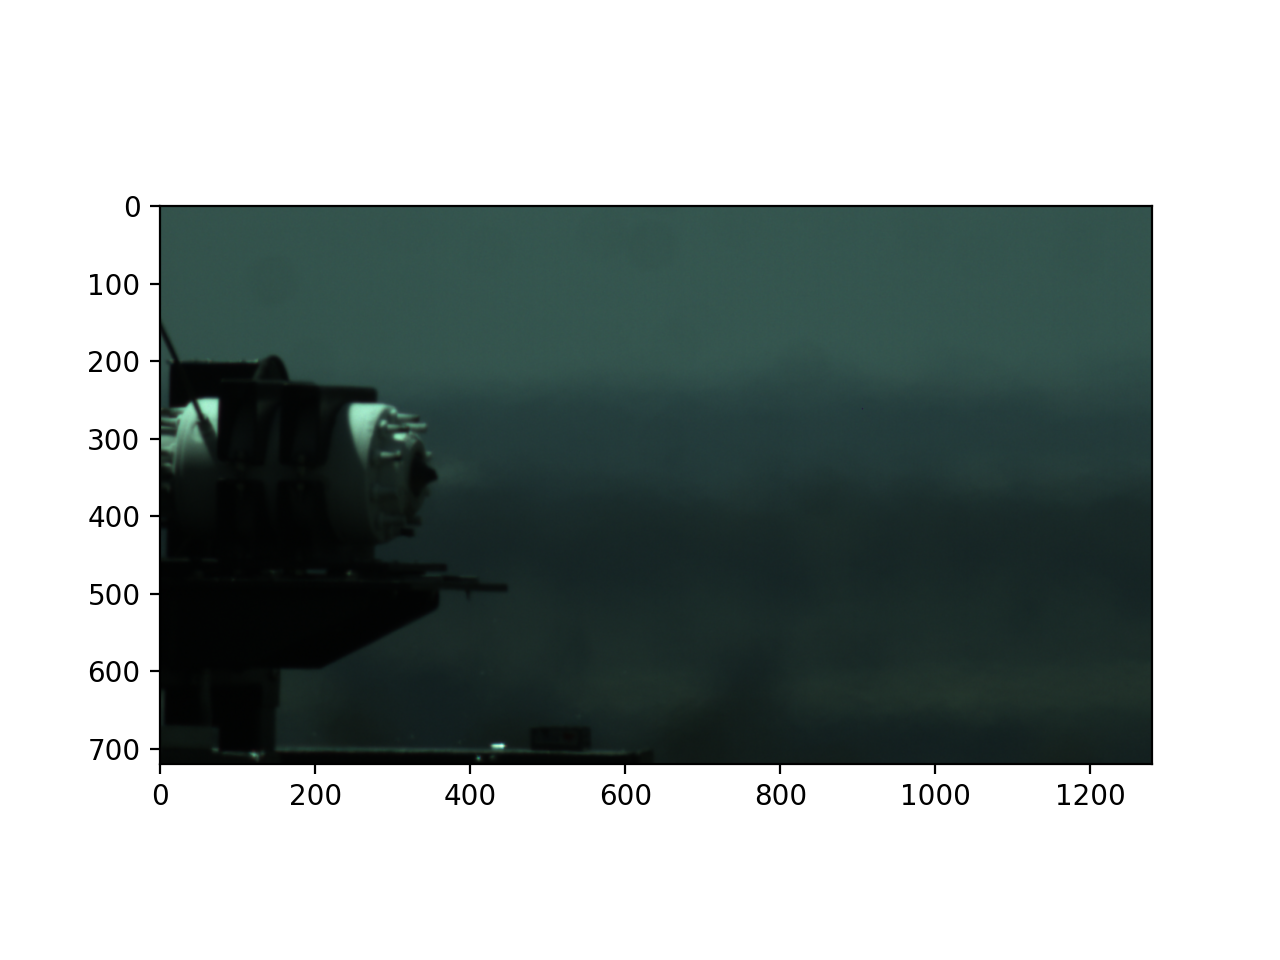

In [33]:
I = ImageSequence(path_to_raw,rawtype='chronos14_color_12bit',width=1280,height=720,frames=None)

fig=plt.figure()
frame=np.moveaxis(I.arr[-1,...],0,2).astype(np.float)
frame/=np.nanmax(frame)
plt.imshow(frame)

In [34]:
dest = os.path.splitext(path_to_raw)[0]
prefix = os.path.basename(dest)
if not os.path.isdir(dest):
    print( "Create directory",dest )
    os.mkdir(dest)
    
overwrite=True#False
for i in range(I.N):
    fn='%s/%s_%06i.tif' % (dest,prefix,i)
    if os.path.isfile(fn) and not overwrite:
        s=input( "File exists! Overwrite all? ")
        if s.lower().strip() != 'y': break
        overwrite=True
    print( '\t',fn )
    #tiff = TIFF.open(fn, mode='w')
    #tiff.write_image(I.arr[i,...])
    #tiff.close()
    with TiffWriter(fn) as tif:
        #print(dir(tif))
        tif.save(I.arr[i,...])#, contiguous=True)

size = sum(os.path.getsize(dest+'/'+f) for f in os.listdir(dest+'/'))/(1024.**2)
print('\nDone. Destination directory size %.1f MB' % size)

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000000.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000001.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000002.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000003.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000004.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000005.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000006.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000007.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000008.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000009.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000010.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000011.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000105.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000106.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000107.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000108.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000109.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000110.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000111.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000112.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000113.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000114.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000115.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000116.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000208.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000209.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000210.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000211.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000212.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000213.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000214.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000215.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000216.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000217.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000218.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000219.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000312.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000313.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000314.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000315.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000316.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000317.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000318.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000319.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000320.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000321.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000322.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000323.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000412.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000413.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000414.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000415.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000416.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000417.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000418.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000419.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000420.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000421.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000422.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000423.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000515.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000516.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000517.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000518.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000519.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000520.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000521.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000522.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000523.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000524.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000525.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000526.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000623.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000624.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000625.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000626.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000627.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000628.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000629.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000630.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000631.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000632.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000633.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000634.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000728.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000729.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000730.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000731.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000732.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000733.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000734.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000735.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000736.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000737.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000738.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000739.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000832.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000833.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000834.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000835.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000836.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000837.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000838.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000839.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000840.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000841.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000842.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000843.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000936.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000937.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000938.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000939.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000940.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000941.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000942.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000943.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000944.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000945.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000946.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_000947.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001042.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001043.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001044.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001045.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001046.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001047.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001048.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001049.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001050.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001051.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001052.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001053.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001150.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001151.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001152.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001153.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001154.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001155.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001156.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001157.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001158.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001159.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001160.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001161.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001252.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001253.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001254.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001255.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001256.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001257.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001258.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001259.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001260.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001261.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001262.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001263.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001352.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001353.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001354.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001355.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001356.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001357.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001358.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001359.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001360.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001361.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001362.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001363.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001460.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001461.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001462.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001463.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001464.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001465.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001466.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001467.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001468.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001469.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001470.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001471.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001564.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001565.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001566.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001567.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001568.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001569.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001570.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001571.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001572.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001573.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001574.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001575.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001671.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001672.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001673.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001674.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001675.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001676.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001677.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001678.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001679.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001680.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001681.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001682.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001773.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001774.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001775.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001776.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001777.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001778.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001779.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001780.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001781.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001782.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001783.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001784.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001873.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001874.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001875.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001876.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001877.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001878.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001879.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001880.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001881.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001882.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001883.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001884.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001980.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001981.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001982.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001983.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001984.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001985.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001986.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001987.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001988.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001989.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001990.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_001991.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002087.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002088.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002089.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002090.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002091.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002092.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002093.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002094.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002095.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002096.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002097.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002098.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002193.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002194.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002195.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002196.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002197.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002198.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002199.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002200.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002201.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002202.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002203.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002204.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002298.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002299.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002300.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002301.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002302.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002303.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002304.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002305.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002306.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002307.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002308.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002309.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002398.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002399.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002400.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002401.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002402.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002403.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002404.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002405.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002406.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002407.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002408.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002409.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002501.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002502.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002503.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002504.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002505.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002506.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002507.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002508.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002509.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002510.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002511.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002512.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002606.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002607.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002608.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002609.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002610.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002611.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002612.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002613.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002614.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002615.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002616.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002617.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002707.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002708.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002709.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002710.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002711.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002712.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002713.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002714.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002715.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002716.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002717.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002718.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002810.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002811.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002812.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002813.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002814.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002815.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002816.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002817.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002818.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002819.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002820.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002821.tif
	 /Users/dduke/D

	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002910.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002911.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002912.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002913.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002914.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002915.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002916.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002917.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002918.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002919.tif
	 /Users/dduke/Desktop/vid_2020-11-17_15-04-03/vid_2020-11-17_15-04-03_002920.tif
